<a href="https://colab.research.google.com/github/AbdulQadir8/Transfer_learning_at_crops_data_VGG16/blob/master/crops_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import os
import pandas as pd
import numpy as np
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.model_selection
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'

In [4]:
!kaggle datasets download -d mdwaquarazam/agricultural-crops-image-classification

 99% 78.0M/79.0M [00:05<00:00, 14.4MB/s]
100% 79.0M/79.0M [00:05<00:00, 15.0MB/s]


In [5]:
  ! unzip agricultural-crops-image-classification.zip

Archive:  agricultural-crops-image-classification.zip
  inflating: Agricultural-crops/Cherry/image15.jpeg  
  inflating: Agricultural-crops/Cherry/image16.jpeg  
  inflating: Agricultural-crops/Cherry/image17.jpeg  
  inflating: Agricultural-crops/Cherry/image18.jpeg  
  inflating: Agricultural-crops/Cherry/image20.jpeg  
  inflating: Agricultural-crops/Cherry/image21.jpeg  
  inflating: Agricultural-crops/Cherry/image22.jpeg  
  inflating: Agricultural-crops/Cherry/image24.jpeg  
  inflating: Agricultural-crops/Cherry/image25.jpeg  
  inflating: Agricultural-crops/Cherry/image27.jpeg  
  inflating: Agricultural-crops/Cherry/image28.jpeg  
  inflating: Agricultural-crops/Cherry/image29.jpeg  
  inflating: Agricultural-crops/Cherry/image30.jpeg  
  inflating: Agricultural-crops/Cherry/image31.jpeg  
  inflating: Agricultural-crops/Cherry/images11.jpg  
  inflating: Agricultural-crops/Cherry/images16.jpg  
  inflating: Agricultural-crops/Cherry/images17.jpg  
  inflating: Agricultural-cr

In [6]:

base_dir = "/content/Agricultural-crops/"

In [7]:
base_dir

'/content/Agricultural-crops/'

In [8]:
os.chdir(base_dir)

In [9]:
base_dir

'/content/Agricultural-crops/'

# Number of agricultural products

In [10]:
# to list every directory name (label name)
directories_list = tf.io.gfile.listdir(base_dir)

In [11]:
directories_list

['jowar',
 'Pearl_millet(bajra)',
 'pineapple',
 'chilli',
 'cardamom',
 'coconut',
 'Tobacco-plant',
 'Olive-tree',
 'Cherry',
 'almond',
 'banana',
 'maize',
 'cotton',
 'gram',
 'jute',
 'rice',
 'soyabean',
 'Lemon',
 'mustard-oil',
 'wheat',
 'Coffee-plant',
 'Cucumber',
 'papaya',
 'sunflower',
 'clove',
 'tea',
 'vigna-radiati(Mung)',
 'sugarcane',
 'Fox_nut(Makhana)',
 'tomato']

In [12]:
# get number of labels
len_labels = len(directories_list)
print(f"Total Class Labels = {len_labels}")

Total Class Labels = 30


In [13]:
vis_images = []; vis_labels = []
length_file_list = []; label_list = []
for item in directories_list:
  # get each label directory
  item_dir = os.path.join(base_dir,item)
  # get list of images of each label
  item_files = os.listdir(item)
  # number of images per label
  len_per_label = len(os.listdir(item))

  length_file_list.append(len_per_label)
  label_list.append(item)


  # get first image of each label(for visualization purpose)
  vis_images.append(os.path.join(item,item_files[0]))
  # get respective label name (for vsualization purpose)
  vis_labels.append(item)


df_temp = pd.DataFrame({'Labels':label_list,'Number of Images':length_file_list}).sort_values(by='Number of Images',ascending=False)
df_temp

Labels  Number of Images
1   Pearl_millet(bajra)                39
6         Tobacco-plant                33
8                Cherry                32
12               cotton                32
21             Cucumber                31
19                wheat                31
10               banana                31
11                maize                31
0                 jowar                30
24                clove                30
7            Olive-tree                30
16             soyabean                30
20         Coffee-plant                29
15                 rice                29
17                Lemon                28
18          mustard-oil                28
26  vigna-radiati(Mung)                27
29               tomato                26
13                 gram                25
5               coconut                25
2             pineapple                25
27            sugarcane                25
23            sunflower                24
14                 jute                23
3                chilli                23
22               papaya                23
25                  tea                23
28     Fox_nut(Makhana)                23
4              cardamom                22
9                almond                21

# Sample image display of each product

In [14]:
import plotly.express as px

class_names = df_temp['Labels']
class_dis = df_temp['Number of Images']

fig = px.pie(names=class_names,
             values=class_dis,
             title='Class Dstribution',
             hole=0.4)
fig.show()

# Split data into Training and Validation

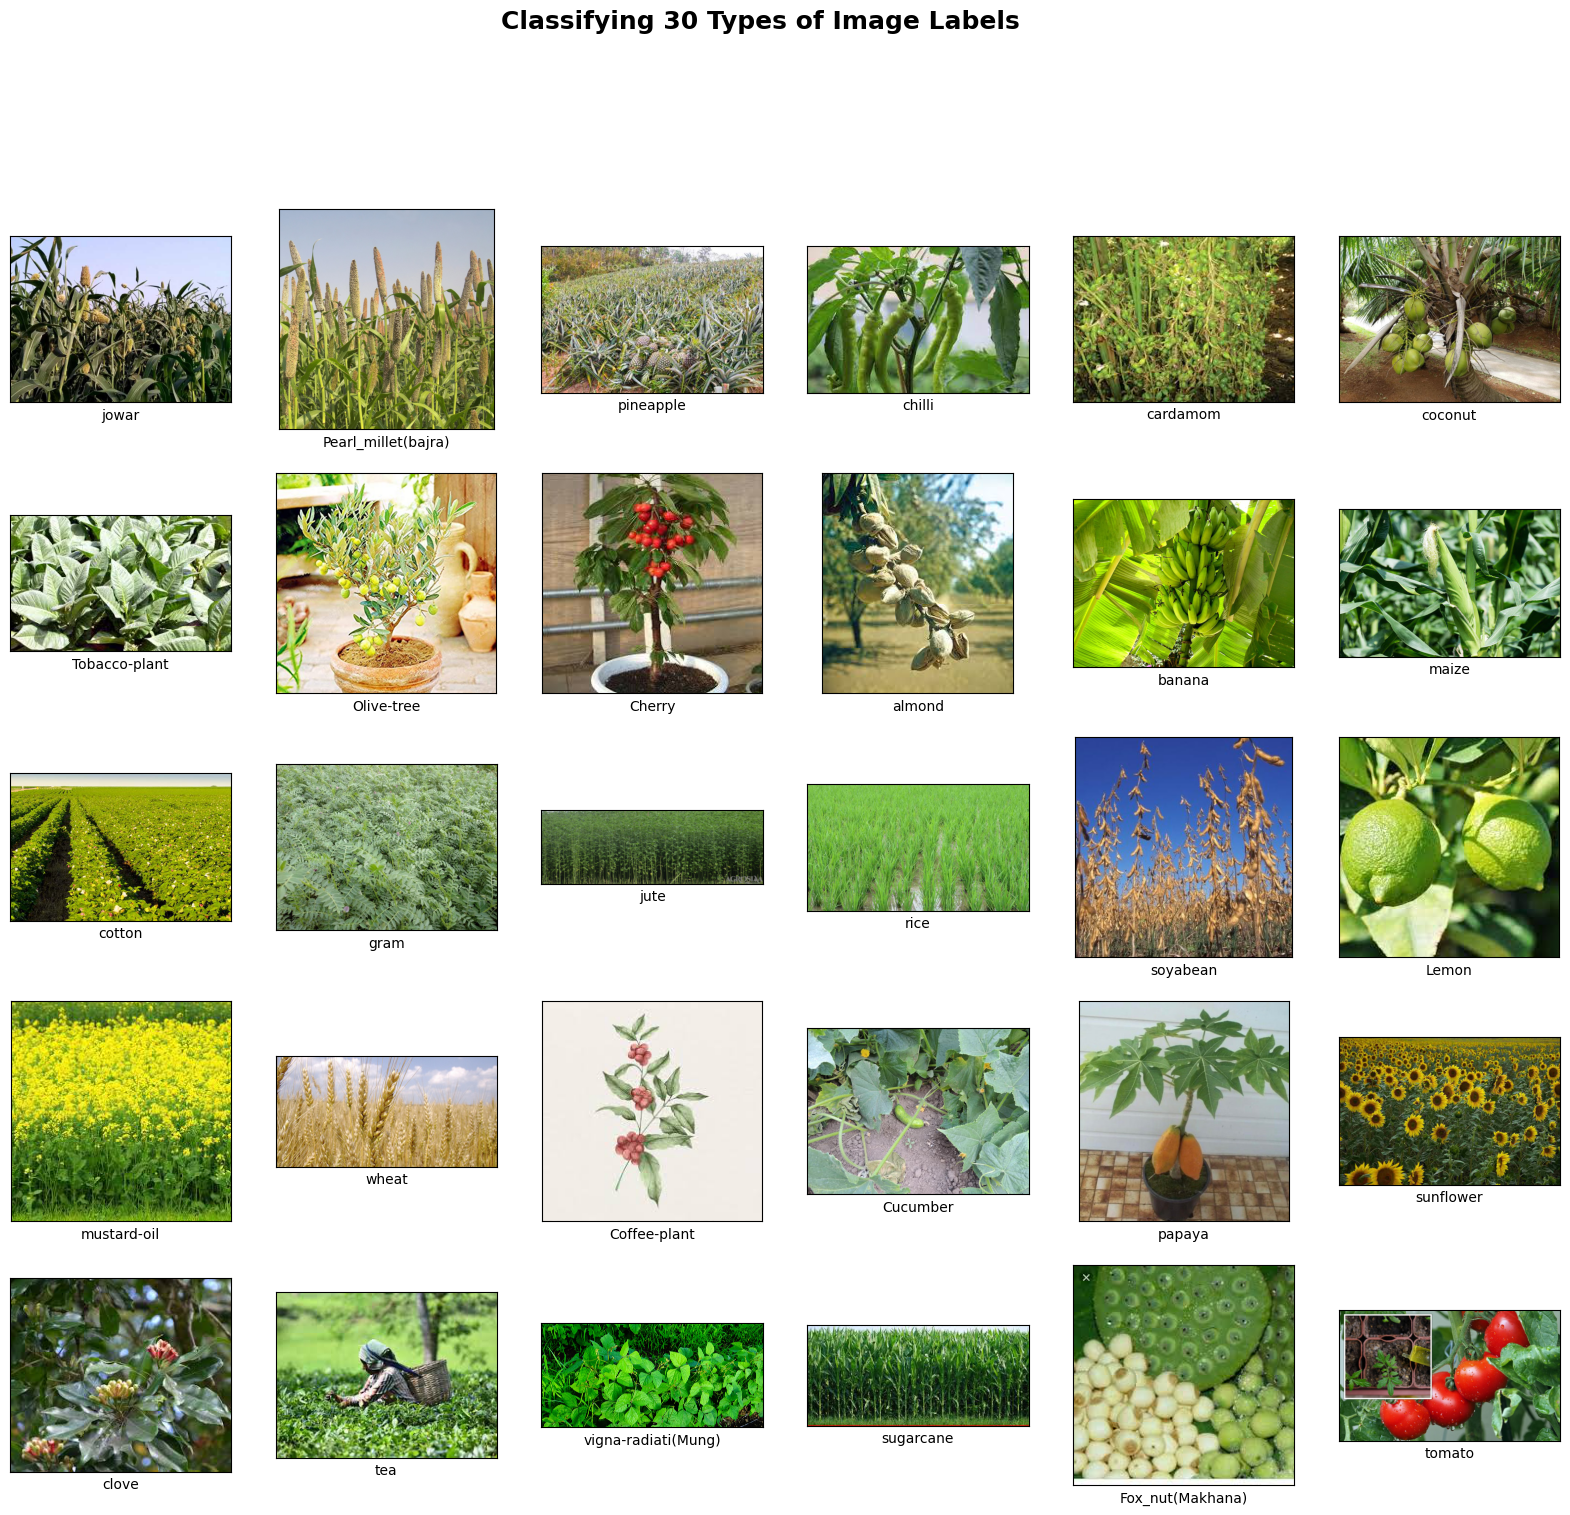

In [15]:
plt.figure(figsize=(20,20))
for i in range(len(vis_labels)):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = mpimg.imread(vis_images[i])
    plt.imshow(img)
    plt.xlabel(vis_labels[i])
    plt.suptitle(f"Classifying {len_labels} Types of Image Labels",fontsize=18, fontweight='bold')
plt.show()



# split data into training and validation

In [16]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    selected_file_names = []
    all_file_names = os.listdir(SOURCE_DIR)
    for file_name in all_file_names:
        file_path = os.path.join(SOURCE_DIR, file_name)
        size = os.path.getsize(file_path)
        if size != 0:
              selected_file_names.append(file_name)
        else:
              print(f"{file_name} is zero length, so ignoring.")

    random.seed(42)
    selected_train_files = random.sample(selected_file_names, int(SPLIT_SIZE * len(selected_file_names)))
    selected_val_files = [x for x in selected_file_names if x not in selected_train_files]

    for file_name in selected_train_files:
        source = os.path.join(SOURCE_DIR, file_name)
        destination = os.path.join(TRAINING_DIR, file_name)
        copyfile(source, destination)

    for file_name in selected_val_files:
        source = os.path.join(SOURCE_DIR, file_name)
        destination = os.path.join(VALIDATION_DIR, file_name)
        copyfile(source, destination)

In [17]:
def create_train_val_dirs(root_path, split_size = 0.9):
    for item in directories_list:
        source_dir = os.path.join(base_dir, item)
        training_dir = os.path.join(root_path, f'_MODELLING/training/{item}')
        validation_dir = os.path.join(root_path, f'_MODELLING/validation/{item}')

        # Create EMPTY directory
        os.makedirs(training_dir)
        os.makedirs(validation_dir)

        split_data(source_dir, training_dir, validation_dir, split_size)
    print(f"Created training and validation directories containing images at split size of {split_size}")


In [ ]:
create_train_val_dirs('/content/drive/MyDrive/train_val_crop',split_size=0.9)

# Image data generator

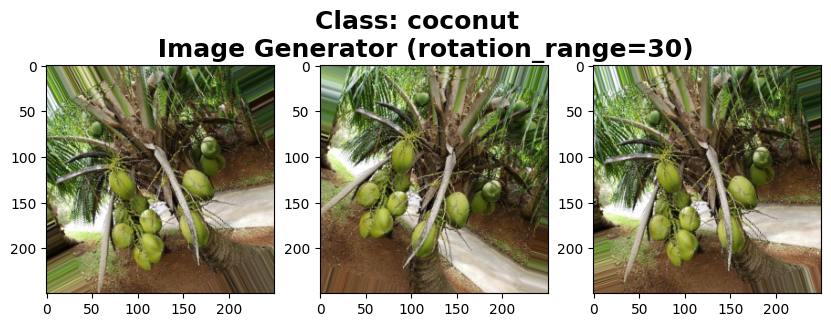

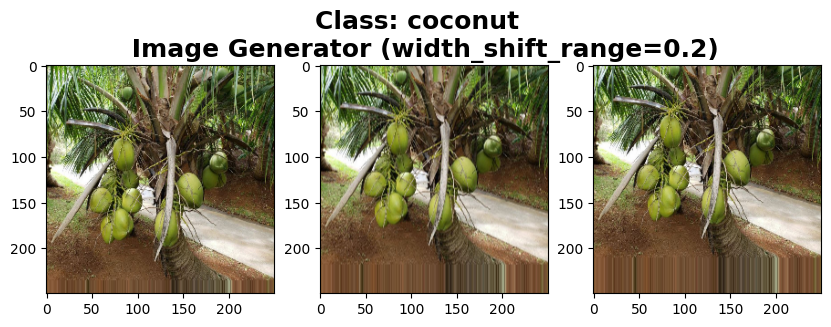

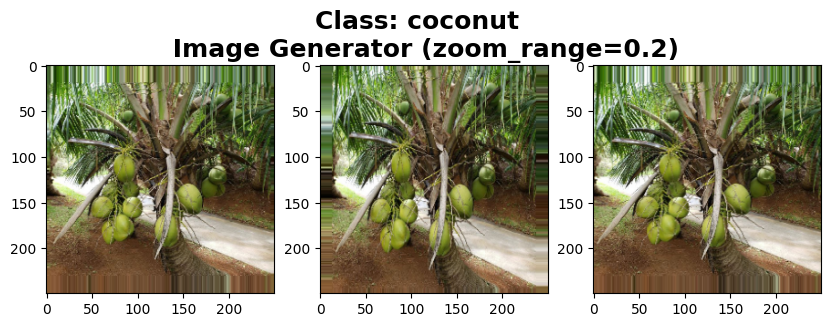

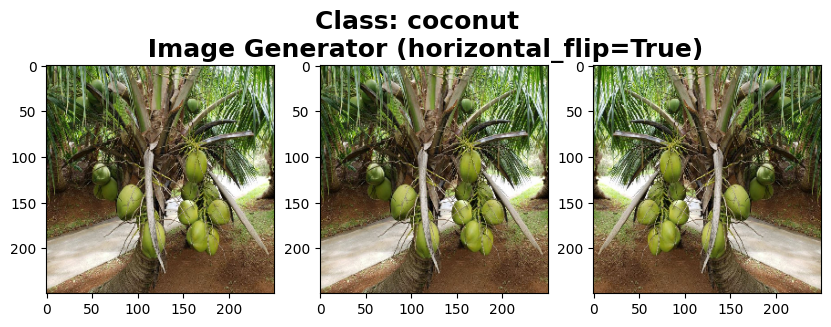

In [19]:

def show_ImageDataGenerator(vis_images, vis_labels, image_index):
    #Loads image in from the set image path
    class_label = vis_labels[image_index+5]
    img = tf.keras.preprocessing.image.load_img(vis_images[image_index+5], target_size= (250,250))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    #Creates our batch of one image
    def show_image(datagen, param):
        pic = datagen.flow(img_tensor, batch_size =1)
        plt.figure(figsize=(10,3.5))
        #Plots our figures
        for i in range(1,4):
            plt.subplot(1, 3, i)
            batch = pic.next()
            image_ = batch[0].astype('uint8')
            plt.imshow(image_)
        plt.suptitle(f"Class: {class_label} \n Image Generator ({param})",fontsize=18, fontweight='bold')

        plt.show()

    datagen = ImageDataGenerator(rotation_range=30)
    show_image(datagen, "rotation_range=30")

    datagen = ImageDataGenerator(width_shift_range=0.2)
    show_image(datagen, "width_shift_range=0.2")

    datagen = ImageDataGenerator(zoom_range=0.2)
    show_image(datagen, "zoom_range=0.2")

    datagen = ImageDataGenerator(horizontal_flip=True)
    show_image(datagen, "horizontal_flip=True")

show_ImageDataGenerator(vis_images, vis_labels, image_index = 0)

In [20]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

    # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
    train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=30,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    return train_generator, validation_generator

In [21]:
training_dir = os.path.join('/content/drive/MyDrive/train_val_crop', '_MODELLING', 'training')
validation_dir = os.path.join('/content/drive/MyDrive/train_val_crop', '_MODELLING', 'validation')

print(validation_dir)

/content/drive/MyDrive/train_val_crop/_MODELLING/validation


In [22]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 731 images belonging to 30 classes.
Found 98 images belonging to 30 classes.



# Model 1 | Basic Deep Convolutional Neural Network


In [23]:
model_1 = tf.keras.Sequential([
    # note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convoluton
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # the second convolution
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(len_labels,activation='softmax')
])

# Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')>0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [25]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics='accuracy')

In [26]:
history_1 = model_1.fit(train_generator,
                        epochs=20,
                        validation_data=validation_generator,
                        callbacks=callbacks)

Epoch 1/20
23/23 [==============================] - 648s 28s/step - loss: 4.2840 - accuracy: 0.0451 - val_loss: 3.3467 - val_accuracy: 0.0408
Epoch 2/20
23/23 [==============================] - 14s 587ms/step - loss: 3.3018 - accuracy: 0.0684 - val_loss: 3.1835 - val_accuracy: 0.0714
Epoch 3/20
23/23 [==============================] - 13s 582ms/step - loss: 3.1171 - accuracy: 0.1040 - val_loss: 3.0374 - val_accuracy: 0.1735
Epoch 4/20
23/23 [==============================] - 13s 580ms/step - loss: 3.0024 - accuracy: 0.1573 - val_loss: 2.9385 - val_accuracy: 0.1122
Epoch 5/20
23/23 [==============================] - 13s 581ms/step - loss: 2.9008 - accuracy: 0.1737 - val_loss: 2.7704 - val_accuracy: 0.1939
Epoch 6/20
23/23 [==============================] - 13s 586ms/step - loss: 2.7671 - accuracy: 0.2120 - val_loss: 2.7335 - val_accuracy: 0.2143
Epoch 7/20
23/23 [==============================] - 16s 684ms/step - loss: 2.6664 - accuracy: 0.2517 - val_loss: 2.5741 - val_accuracy: 0.2143


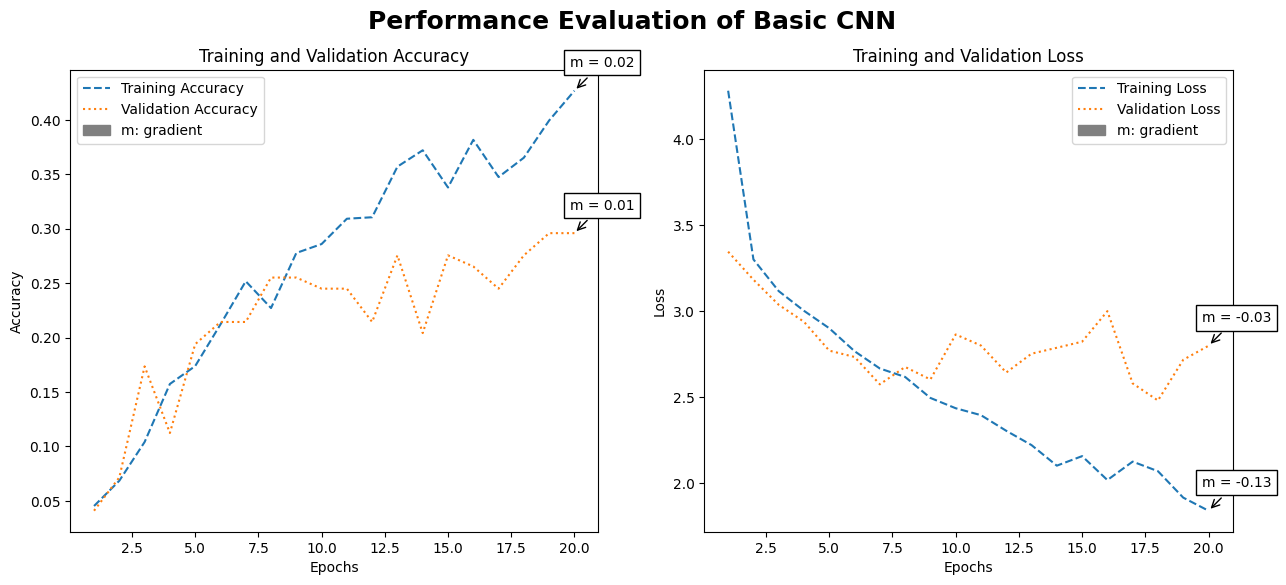

In [28]:
def vis_evaluation(history_dict, model_name):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    epochs = range(1, len(history_dict['accuracy'])+1)

    def get_gradient(y_arr, epochs):
        return round((y_arr[-1] - y_arr[0]) / (epochs[-1] - epochs[0]),2)

    def vis_sub_evaluation(n, Accuracy, train_acc, val_acc, epochs):
        axs[n].plot(epochs, train_acc, label=f'Training {Accuracy}', ls='--')
        axs[n].plot(epochs, val_acc, label=f'Validation {Accuracy}', ls='dotted')

        axs[n].set_title(f'Training and Validation {Accuracy}')
        axs[n].set_xlabel('Epochs')
        axs[n].set_ylabel(Accuracy)

        handles, labels = axs[n].get_legend_handles_labels()
        m_patch = mpatches.Patch(color='grey',label='m: gradient')
        handles.append(m_patch)
        axs[n].legend(handles=handles)

        def annotate_box(train_acc):
            return AnnotationBbox(TextArea(f"m = {get_gradient(train_acc, epochs)}"), (epochs[-1], train_acc[-1]),
                            xybox=(20, 20),
                            xycoords='data',
                            boxcoords="offset points",
                            arrowprops=dict(arrowstyle="->"))
        axs[n].add_artist(annotate_box(train_acc))
        axs[n].add_artist(annotate_box(val_acc))

    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    vis_sub_evaluation(0, 'Accuracy', train_acc, val_acc, epochs)

    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    vis_sub_evaluation(1, 'Loss', train_loss, val_loss, epochs)

    plt.suptitle(f"Performance Evaluation of {model_name}",fontsize=18, fontweight='bold')
    plt.show()

history_dict_1 = history_1.history
vis_evaluation(history_dict_1, 'Basic CNN')

# Model 2 | Transfer Learning

In [29]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(include_top=False,weights='imagenet',input_shape=(150,150,3))
for layer in pre_trained_model.layers:
  layer.trainable = False

total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params} trainable parameters in this model.")

58889256/58889256 [==============================] - 4s 0us/step
There are 14,714,688 total parameters in this model.
There are 0 trainable parameters in this model.


In [30]:
last_output = pre_trained_model.output
print("last layer output: ",last_output)

# print the type of the pre_trained model
print(f"The pretrained model has type:{type(pre_trained_model.output)}")

last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")
The pretrained model has type:<class 'keras.engine.keras_tensor.KerasTensor'>


In [34]:
import tensorflow as tf

In [38]:
from tensorflow.keras.models import Model
def transfer_learning(last_model,pre_trained_model):
  # Flatten the output layer to one dimension
  x = tf.keras.layers.Flatten()(last_output)
  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(1024,activation='relu')(x)
  # Add a dropout rate of 0.3
  x = tf.keras.layers.Dropout(0.3)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense(len_labels,activation='softmax')(x)
  # create complete  Model by using the Suer Man
  model = Model(inputs=pre_trained_model.input, outputs=x)
  return model

In [39]:
model_2 = transfer_learning(last_output,pre_trained_model)
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [40]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [41]:
history_2 = model_2.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=20,
                        callbacks=callbacks)

Epoch 1/20
23/23 [==============================] - 20s 700ms/step - loss: 4.1146 - accuracy: 0.0917 - val_loss: 2.8447 - val_accuracy: 0.2143
Epoch 2/20
23/23 [==============================] - 14s 592ms/step - loss: 2.6982 - accuracy: 0.2435 - val_loss: 2.3236 - val_accuracy: 0.3878
Epoch 3/20
23/23 [==============================] - 14s 594ms/step - loss: 2.3533 - accuracy: 0.3557 - val_loss: 2.2136 - val_accuracy: 0.3571
Epoch 4/20
23/23 [==============================] - 14s 609ms/step - loss: 2.1166 - accuracy: 0.3817 - val_loss: 2.0872 - val_accuracy: 0.3878
Epoch 5/20
23/23 [==============================] - 14s 591ms/step - loss: 1.9644 - accuracy: 0.4583 - val_loss: 1.9577 - val_accuracy: 0.4388
Epoch 6/20
23/23 [==============================] - 14s 598ms/step - loss: 1.7447 - accuracy: 0.5089 - val_loss: 1.9177 - val_accuracy: 0.4082
Epoch 7/20
23/23 [==============================] - 15s 668ms/step - loss: 1.6712 - accuracy: 0.5130 - val_loss: 1.8777 - val_accuracy: 0.5000

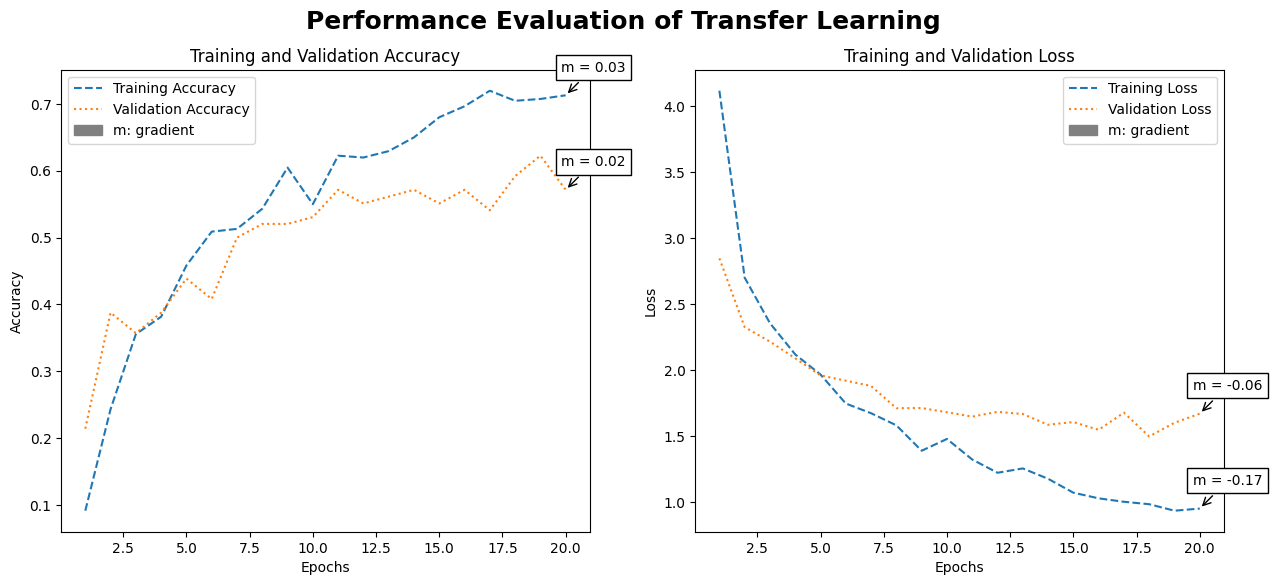

In [42]:
history_dict_2 = history_2.history
vis_evaluation(history_dict_2,'Transfer Learning')